# DUAW: Building of a recommendation system

###### Aim: Based on a displayed project Techlabs three further projects would be proposed

###### Dataset: 
0. Testing dataset: manually made text data for 35 projects (JSON file)
1. The Github API requests deliver information from the "About" section - saved in JSON file
2. Final dataset: growing project repositories from Techlabs displayed on DUAW website

#### Text based analysis
#### Exploratory data analysis: 
- word clouds
- counting of words

- sequence matcher: from difflib import SequenceMatcher # 

#### Machine learning algorithms from scitlearn for text data
- Bag of words 
- BERT

###### weighing of repeated terms:
- log 1 p transformation
- Tf-idf (Term Frequency, inverse document frequency)

##### Similarity analysis code
- cosine similarity
- euclidean distance
- others?

##### choise of recomendation
- numpy arg sort (argument sorting) for taking the [-2, -4] arguments

##### comparison for the Testing dataset
- heatmap of similarity analysis
- comparison of results from similarity analysis

#### Choice of similarity analysis 

#### implementation for the final dataset, which would be growing with the additions of further repositories.

#### Final result: JSON file with the repository name and the 3 nearest neighbours
safed on Github, that can be accessed and used as routing directions for the website




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from scipy import stats
#from sklearn.linear_model import LinearRegression

In [2]:
def display_all(df):
    with pd.option_context('display.max_rows',None,'display.max_columns', None):
        display(df)  

##### 1) Loading data

In [3]:
filename = "DUAW_ Datasheet - Sheet1.csv" # Choose file
whole_table = pd.read_csv(filename)
whole_table.head(39) 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,future Github repostiory name,Full Project name (for display),up to 350 Char,"3-4 Words, comma seperated",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Project number,(place for notes for communication),project_name,project_name_full,project_description,project_topics,project_picture,project_picture_large,link to Github repository,...,github_name,github_url,name:,full_name:,track:,github_name:,github_url:,linkedin_url:,email_adress:,display:
3,NaN,1. Example:,We only need information on the green columns!,test-repository-1,Test Respository,This is a test repository that helps the DUAW ...,"project, duaw, API",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,already in fake techlabs,st21-beachblue,Beachblue,The idea behind Beachblue is to help everyone ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2,already in fake techlabs,st21-what-street-art,What Street Art,What Street Art is an app designed to explore ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,3,already in fake techlabs,Travel-20,Travel 20,Travel 21 aims to simplify the research for tr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,4,already in fake techlabs,st21-busking-radar,Busking Radar,Busking Radar is the final group project which...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,5,already in fake techlabs,st21-what-the-wine,What the Wine,What the Wine is a team Web/App project develo...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,6,already in fake techlabs,st21-artifacts,Artifacts,Artifacts - Born from an idea to provide the B...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2) Data cleaning


In [4]:
data_df = whole_table.iloc[2:,[3,5]]
data_df.rename(columns=data_df.iloc[0], inplace = True)
data_df.drop(data_df.index[0], inplace = True)
data_df.reset_index(inplace = True)
#data_df = data_df.set_index('Unnamed: 0')
data_df

,index,project_name,project_description
0,3,test-repository-1,This is a test repository that helps the DUAW ...
1,4,st21-beachblue,The idea behind Beachblue is to help everyone ...
2,5,st21-what-street-art,What Street Art is an app designed to explore ...
3,6,Travel-20,Travel 21 aims to simplify the research for tr...
4,7,st21-busking-radar,Busking Radar is the final group project which...
5,8,st21-what-the-wine,What the Wine is a team Web/App project develo...
6,9,st21-artifacts,Artifacts - Born from an idea to provide the B...
7,10,st21-jobzilla,"Jobzilla is an AI-driven app, which will find ..."
8,11,st21-terraViz,TerraViz is an interactive map visualization w...
9,12,st21-stress-tracker,This repository represents a stress tracking p...


#### Remove punctuation/lower casing

In [5]:
# Load the regular expression library
import re
# Remove punctuation
data_df['paper_text_processed'] = \
data_df['project_description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data_df['paper_text_processed'] = \
data_df['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data_df['paper_text_processed'].head()

0    this is a test repository that helps the duaw ...
1    the idea behind beachblue is to help everyone ...
2    what street art is an app designed to explore ...
3    travel 21 aims to simplify the research for tr...
4    busking radar is the final group project which...
Name: paper_text_processed, dtype: object

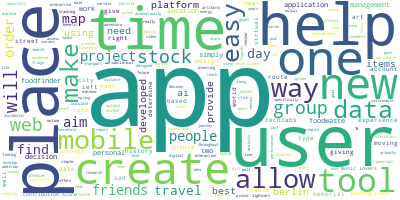

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data_df['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

##### Similarity analysis

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [8]:
corpus = data_df.project_description
corpus

0     This is a test repository that helps the DUAW ...
1     The idea behind Beachblue is to help everyone ...
2     What Street Art is an app designed to explore ...
3     Travel 21 aims to simplify the research for tr...
4     Busking Radar is the final group project which...
5     What the Wine is a team Web/App project develo...
6     Artifacts - Born from an idea to provide the B...
7     Jobzilla is an AI-driven app, which will find ...
8     TerraViz is an interactive map visualization w...
9     This repository represents a stress tracking p...
10    Find your own time management type for extra p...
11    Foodfinder is a digital tool to manage your fr...
12    SimpleCare offers the possibility to publish s...
13    AllOkayApp is an App designed to assist people...
14    Let’s Remember” delivers insights about the po...
15    ImmoScan aims to make the real estate market m...
16    “NutriFinder” calculates the individually requ...
17    Osoroi Code aims to create a clothes match

In [9]:
repo_names = data_df.project_name
repo_names

0        test-repository-1
1           st21-beachblue
2     st21-what-street-art
3                Travel-20
4       st21-busking-radar
5       st21-what-the-wine
6           st21-artifacts
7            st21-jobzilla
8            st21-terraViz
9      st21-stress-tracker
10         wt22-schedule-n
11             Food Finder
12              SimpleCare
13              AllOkayApp
14          Let’s Remember
15                ImmoScan
16             NutriFinder
17             Osoroi Code
18              Foodfinder
19               LaufDiggy
20                Verropay
21       DogBreedDetec App
22         Epilog Memorial
23                  Places
24                 Lithops
25               Lightcert
26                   Deely
27       Planned Adventure
28                Bird$Eye
29                Blindlov
30           The Pride App
31                    Reef
32            Xploro world
33         DistanceChecker
34             Sustainvest
35                   NoSAD
Name: project_name, dtype: o

### Vectorization

##### bag of words

In [10]:
vectorizer = CountVectorizer() # numrac list
features = vectorizer.fit_transform(corpus).todense() # each of these documents, in list of numbers
#print( vectorizer.vocabulary_ ) # dic with all existing words (count)

### Similarity analysis

##### Euclidan distance vs Cosine_similarity
https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity#:~:text=The%20Euclidean%20distance%20corresponds%20to,the%20product%20of%20their%20magnitudes.

Cite:
"The Euclidean distance corresponds to the L2-norm of a difference between vectors. The cosine similarity is proportional to the dot product of two vectors and inversely proportional to the product of their magnitudes."


The decision as to which metric to use depends on the particular task that we have to perform:

Some tasks, such as preliminary data analysis, benefit from both metrics; each of them allows the extraction of different insights on the structure of the data
Others, such as text classification, generally function better under Euclidean distances
Some more, such as retrieval of the most similar texts to a given document, generally function better with cosine similarity

In [11]:
#for f in features:
#    print( euclidean_distances(features[0], f) ) # distance between documents

In [12]:
#for f in features:
#    print( cosine_similarity(features[0], f)) #let's calculate cosine similarity for sentence 0:

Comparing Euclidian distance and cosine similarity:
- if no normalisation beforehand
- normalisation and taking into acount frequency (eg by tf-idf vectors and or log 1p transformation)


tf-idf vectors

In [17]:
import numpy as np
a= np.zeros( (len(features), len(features)) )
b= np.zeros( (len(features), len(features)) )
len(features)

36

In [18]:
x=-1
y=-1
for each in features:
    x=x+1
    for f in features:
        y=y+1
        value =  euclidean_distances(each, f) # distance between documents
        a[y][x]=value
    y=-1
#print(a)
a_df = pd.DataFrame(a)

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

In [19]:
a_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,8.185353,9.433981,8.246211,10.148892,7.549834,12.529964,8.717798,6.855655,7.000000,...,8.062258,7.549834,7.874008,11.224972,7.141428,7.280110,8.831761,12.727922,9.848858,8.944272
1,8.185353,0.000000,9.380832,8.426150,10.677078,7.483315,12.409674,8.660254,7.071068,7.071068,...,7.483315,7.615773,7.549834,11.532563,6.782330,7.348469,9.110434,11.958261,9.695360,9.110434
2,9.433981,9.380832,0.000000,8.774964,11.224972,8.602325,11.832160,8.660254,8.366600,8.602325,...,8.831761,8.366600,8.544004,11.958261,7.874008,8.246211,9.433981,12.041595,9.273618,9.746794
3,8.246211,8.426150,8.774964,0.000000,10.148892,7.810250,11.445523,8.831761,7.681146,7.681146,...,7.810250,7.549834,7.874008,10.862780,7.280110,7.141428,8.602325,12.649111,9.219544,9.486833
4,10.148892,10.677078,11.224972,10.148892,0.000000,10.198039,12.489996,11.269428,10.295630,10.583005,...,10.583005,10.099505,10.630146,12.688578,10.295630,10.198039,10.630146,14.247807,11.575837,11.618950
5,7.549834,7.483315,8.602325,7.810250,10.198039,0.000000,11.832160,8.062258,6.000000,6.324555,...,7.211103,7.071068,6.708204,11.618950,6.480741,6.164414,9.000000,12.449900,9.695360,8.888194
6,12.529964,12.409674,11.832160,11.445523,12.489996,11.832160,0.000000,12.529964,12.409674,12.569805,...,11.916375,11.401754,12.124356,13.674794,12.328828,11.224972,10.908712,15.524175,12.247449,12.609520
7,8.717798,8.660254,8.660254,8.831761,11.269428,8.062258,12.529964,0.000000,7.681146,7.937254,...,7.937254,8.306624,8.246211,11.575837,7.549834,7.810250,9.380832,11.747340,9.848858,9.486833
8,6.855655,7.071068,8.366600,7.681146,10.295630,6.000000,12.409674,7.681146,0.000000,5.291503,...,6.324555,6.324555,6.082763,11.958261,5.291503,5.830952,8.774964,12.449900,9.055385,8.426150
9,7.000000,7.071068,8.602325,7.681146,10.583005,6.324555,12.569805,7.937254,5.291503,0.000000,...,6.324555,6.928203,6.244998,12.369317,5.291503,6.000000,8.888194,12.767145,9.165151,9.000000


In [20]:
x=-1
y=-1
for each in features:
    x=x+1
    for f in features:
        y=y+1
        value =  cosine_similarity(each, f) # distance between documents
        b[y][x]=value
    y=-1
#print(a)
b_df = pd.DataFrame(b)

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

closeness measuring in ratio (normalisaiton): 
https://www.codecademy.com/article/normalization
- min-max normalisation: \frac{value - min}{max - min}
- Z-Score Normalization: \frac{value - \mu}{\sigma}
(μ is the mean value of the feature and σ is the standard deviation of the feature)
"Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.
Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale."

In [21]:
column_maxes = a_df.max()
a_df_max = column_maxes.max()
column_min = a_df.min() # min = 0.0 for own element
a_df_min = column_min.min()
a_df_normalized = a_df / a_df_max
print(a_df_max)
print(a_df_min)
a_df_normalized 

16.673332000533065
0.0


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.490925,0.565813,0.494575,0.608690,0.452809,0.751497,0.522859,0.411175,0.419832,...,0.483542,0.452809,0.472252,0.673229,0.428314,0.436632,0.529694,0.763370,0.590695,0.536442
1,0.490925,0.000000,0.562625,0.505367,0.640369,0.448819,0.744283,0.519408,0.424094,0.424094,...,0.448819,0.456764,0.452809,0.691677,0.406777,0.440732,0.546407,0.717209,0.581489,0.546407
2,0.565813,0.562625,0.000000,0.526287,0.673229,0.515933,0.709646,0.519408,0.501795,0.515933,...,0.529694,0.501795,0.512435,0.717209,0.472252,0.494575,0.565813,0.722207,0.556195,0.584574
3,0.494575,0.505367,0.526287,0.000000,0.608690,0.468428,0.686457,0.529694,0.460685,0.460685,...,0.468428,0.452809,0.472252,0.651506,0.436632,0.428314,0.515933,0.758643,0.552952,0.568982
4,0.608690,0.640369,0.673229,0.608690,0.000000,0.611638,0.749100,0.675895,0.617491,0.634726,...,0.634726,0.605728,0.637554,0.761010,0.617491,0.611638,0.637554,0.854527,0.694273,0.696858
5,0.452809,0.448819,0.515933,0.468428,0.611638,0.000000,0.709646,0.483542,0.359856,0.379322,...,0.432493,0.424094,0.402331,0.696858,0.388689,0.369717,0.539784,0.746695,0.581489,0.533078
6,0.751497,0.744283,0.709646,0.686457,0.749100,0.709646,0.000000,0.751497,0.744283,0.753887,...,0.714697,0.683832,0.727171,0.820160,0.739434,0.673229,0.654261,0.931078,0.734553,0.756269
7,0.522859,0.519408,0.519408,0.529694,0.675895,0.483542,0.751497,0.000000,0.460685,0.476045,...,0.476045,0.498198,0.494575,0.694273,0.452809,0.468428,0.562625,0.704559,0.590695,0.568982
8,0.411175,0.424094,0.501795,0.460685,0.617491,0.359856,0.744283,0.460685,0.000000,0.317363,...,0.379322,0.379322,0.364820,0.717209,0.317363,0.349717,0.526287,0.746695,0.543106,0.505367
9,0.419832,0.424094,0.515933,0.460685,0.634726,0.379322,0.753887,0.476045,0.317363,0.000000,...,0.379322,0.415526,0.374550,0.741862,0.317363,0.359856,0.533078,0.765722,0.549689,0.539784


In [22]:
column_maxes = b_df.max()
b_df_max = column_maxes.max()
column_min = b_df.min() # min = 0.0 for own element
a_df_min = column_min.min()
a_df_normalized = 1-(a_df / a_df_max)
print(a_df_max)
print(a_df_min)
#a_df_normalized 

16.673332000533065
0.0


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

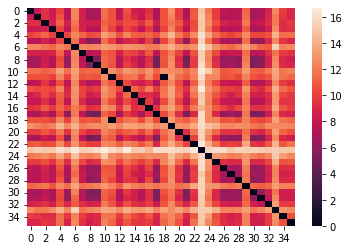

In [24]:
ax = sns.heatmap(a_df)

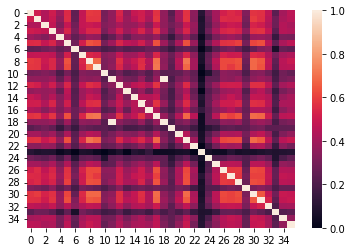

In [25]:
ax = sns.heatmap(a_df_normalized)

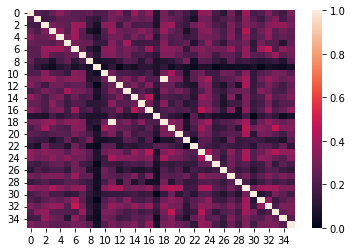

In [26]:
bx = sns.heatmap(b_df)

#### differences between similarity algorithms:
difference between normalized a and b:

a: two ourliers: 18 and 11?
and 23 very similar to almost all

b: two ourliers: 18 and 11?
unsimilar: 


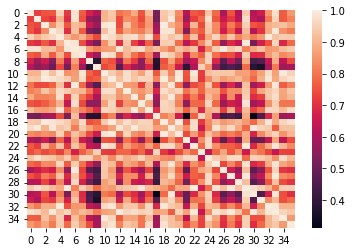

In [27]:
c_df = 1-abs(a_df_normalized-b_df)
cx = sns.heatmap(c_df)

#### sorting of results from similarity analysis

In [28]:
#numpy.argsort(a, axis=- 1, kind=None, order=None)

In [29]:
x=-1
y=-1
for each in features:
    x=x+1
    for f in features:
        y=y+1
        value = cosine_similarity(each, f) # distance between documents
        b[y][x]=value
    y=-1
#print(a)
d_df = pd.DataFrame(b)

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

In [30]:
#d_df

In [31]:
#Sorting algorithm
list_of_lists =[]
for each in d_df.columns: # for each column in data frame
    list_series=[]
    current_series = d_df[each]
    sorted_series = current_series.sort_values(ascending=False)
   # return list with repositoryies
    for each in sorted_series.index:
        list_series.append(repo_names[each]) # append list 
    list_of_lists.append(list_series)

In [39]:
df = pd.DataFrame(list_of_lists)
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,test-repository-1,Blindlov,Let’s Remember,Places,Lithops,NutriFinder,st21-busking-radar,SimpleCare,Xploro world,NoSAD,...,Lightcert,AllOkayApp,The Pride App,st21-what-street-art,DogBreedDetec App,Sustainvest,Bird$Eye,Epilog Memorial,Deely,Osoroi Code
1,st21-beachblue,Blindlov,DistanceChecker,Places,Foodfinder,Food Finder,Lithops,NutriFinder,Let’s Remember,NoSAD,...,Sustainvest,Bird$Eye,st21-what-street-art,Reef,Lightcert,st21-terraViz,DogBreedDetec App,st21-stress-tracker,Osoroi Code,Epilog Memorial
2,st21-what-street-art,LaufDiggy,st21-artifacts,st21-jobzilla,Sustainvest,DistanceChecker,Foodfinder,Food Finder,Places,wt22-schedule-n,...,Let’s Remember,Verropay,test-repository-1,st21-beachblue,SimpleCare,Deely,st21-terraViz,DogBreedDetec App,Osoroi Code,st21-stress-tracker
3,Travel-20,Blindlov,st21-artifacts,Foodfinder,Food Finder,Xploro world,st21-busking-radar,Lithops,ImmoScan,Places,...,wt22-schedule-n,st21-beachblue,Deely,The Pride App,Osoroi Code,Epilog Memorial,Bird$Eye,st21-terraViz,DogBreedDetec App,st21-stress-tracker
4,st21-busking-radar,st21-artifacts,Xploro world,Blindlov,Travel-20,test-repository-1,NutriFinder,Planned Adventure,Let’s Remember,Places,...,LaufDiggy,wt22-schedule-n,Deely,st21-terraViz,The Pride App,Bird$Eye,Epilog Memorial,DogBreedDetec App,Osoroi Code,st21-stress-tracker
5,st21-what-the-wine,AllOkayApp,Lithops,Foodfinder,Food Finder,st21-artifacts,Reef,Blindlov,st21-busking-radar,Planned Adventure,...,NutriFinder,Let’s Remember,Osoroi Code,ImmoScan,wt22-schedule-n,st21-stress-tracker,Deely,The Pride App,Sustainvest,Epilog Memorial
6,st21-artifacts,Xploro world,Reef,st21-busking-radar,NutriFinder,Travel-20,Planned Adventure,st21-what-street-art,Blindlov,Food Finder,...,st21-beachblue,Bird$Eye,test-repository-1,ImmoScan,DistanceChecker,Osoroi Code,The Pride App,DogBreedDetec App,st21-terraViz,st21-stress-tracker
7,st21-jobzilla,DistanceChecker,st21-what-street-art,Blindlov,Foodfinder,Food Finder,LaufDiggy,wt22-schedule-n,Places,AllOkayApp,...,st21-terraViz,ImmoScan,DogBreedDetec App,Let’s Remember,Epilog Memorial,Bird$Eye,NutriFinder,Lightcert,Osoroi Code,st21-stress-tracker
8,st21-terraViz,DogBreedDetec App,st21-what-the-wine,test-repository-1,Planned Adventure,NoSAD,AllOkayApp,Places,Lithops,NutriFinder,...,Reef,Foodfinder,Food Finder,Deely,wt22-schedule-n,Sustainvest,Osoroi Code,Travel-20,st21-stress-tracker,Epilog Memorial
9,st21-stress-tracker,test-repository-1,st21-what-the-wine,Food Finder,Foodfinder,st21-beachblue,ImmoScan,NutriFinder,st21-jobzilla,st21-busking-radar,...,Blindlov,Planned Adventure,LaufDiggy,DistanceChecker,Travel-20,Sustainvest,Epilog Memorial,Lightcert,SimpleCare,Reef


### some analysis of the resulting "network"

In [33]:
frequency_df = pd.DataFrame(repo_names).set_index('project_name')

In [34]:
for each in df.columns: 
    dd_dd=df[each]
    frequency_df[each] = 0
    for val, cnt in dd_dd.value_counts().iteritems():
        frequency_df[each][val]= cnt
        #print ('value', val, 'was found', cnt, 'times')

In [35]:
frequency_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
project_name,,,,,,,,,,,,,,,,,,,,,
test-repository-1,1,1,0,2,1,1,3,0,1,0,...,0,6,2,0,0,0,0,0,0,0
st21-beachblue,1,0,0,0,0,1,1,1,0,0,...,3,2,0,1,0,0,1,0,0,0
st21-what-street-art,1,1,3,0,2,1,2,2,0,1,...,2,0,1,1,0,0,0,0,0,0
Travel-20,1,1,1,0,3,2,0,3,2,1,...,0,0,0,0,1,1,0,1,0,0
st21-busking-radar,1,0,0,2,1,0,2,0,3,2,...,0,0,0,0,0,0,0,0,0,0
st21-what-the-wine,1,1,2,1,1,0,0,1,2,2,...,1,2,1,2,2,1,0,0,0,0
st21-artifacts,1,6,3,3,2,2,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
st21-jobzilla,1,0,0,2,1,2,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
st21-terraViz,1,1,0,0,0,0,0,0,0,0,...,3,0,3,2,1,2,4,6,3,0


Important: same repository Foodfinder and Food finder, but doesnt get returnded the same way???

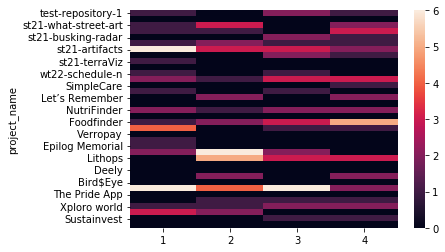

In [36]:
fx = sns.heatmap(frequency_df.T.iloc[:][1:5].T)

#### Visualisation of Network
https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259

$ pip install pyvis

In [37]:
from pyvis.network import Network
import plotly.graph_objects as go
import networkx as nx

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



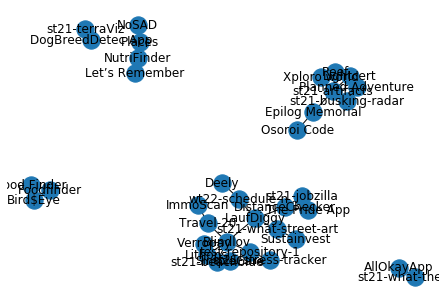

In [45]:
# Build your graph
#G=nx.from_pandas_edgelist(db, 'from', 'to')
G=nx.from_pandas_edgelist(df, 0, 1)
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [46]:
# Example Networkgraph:https://plotly.com/python/network-graphs/
G = nx.random_geometric_graph(200, 0.125)

#### Create Edges

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

### Color Node Points
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

####Create Network Graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [47]:
G 

## export results in JSON files

In [48]:
data = df.to_json(orient='values')
print(data)

[["test-repository-1","Blindlov","Let\u2019s Remember","Places","Lithops","NutriFinder","st21-busking-radar","SimpleCare","Xploro world","NoSAD","Foodfinder","Food Finder","Planned Adventure","ImmoScan","st21-what-the-wine","Travel-20","st21-terraViz","Verropay","st21-jobzilla","st21-artifacts","st21-beachblue","Reef","DistanceChecker","wt22-schedule-n","st21-stress-tracker","LaufDiggy","Lightcert","AllOkayApp","The Pride App","st21-what-street-art","DogBreedDetec App","Sustainvest","Bird$Eye","Epilog Memorial","Deely","Osoroi Code"],["st21-beachblue","Blindlov","DistanceChecker","Places","Foodfinder","Food Finder","Lithops","NutriFinder","Let\u2019s Remember","NoSAD","LaufDiggy","Xploro world","Planned Adventure","st21-busking-radar","SimpleCare","ImmoScan","st21-what-the-wine","st21-artifacts","The Pride App","test-repository-1","st21-jobzilla","AllOkayApp","Verropay","wt22-schedule-n","Deely","Travel-20","Sustainvest","Bird$Eye","st21-what-street-art","Reef","Lightcert","st21-terraV

In [49]:
# Convert DataFrame to JSON
data = df.to_json('./recomendations2.json', orient='values')
print(data)

None
